In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
data = pd.read_csv("Wholesale customers data.csv")
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [4]:
data.tail(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
430,1,3,3097,4230,16483,575,241,2080
431,1,3,8533,5506,5160,13486,1377,1498
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [5]:
#Preliminary exploration of data
data.shape

(440, 8)

In [6]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
#Exploratory data analysis (EDA)


In [12]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


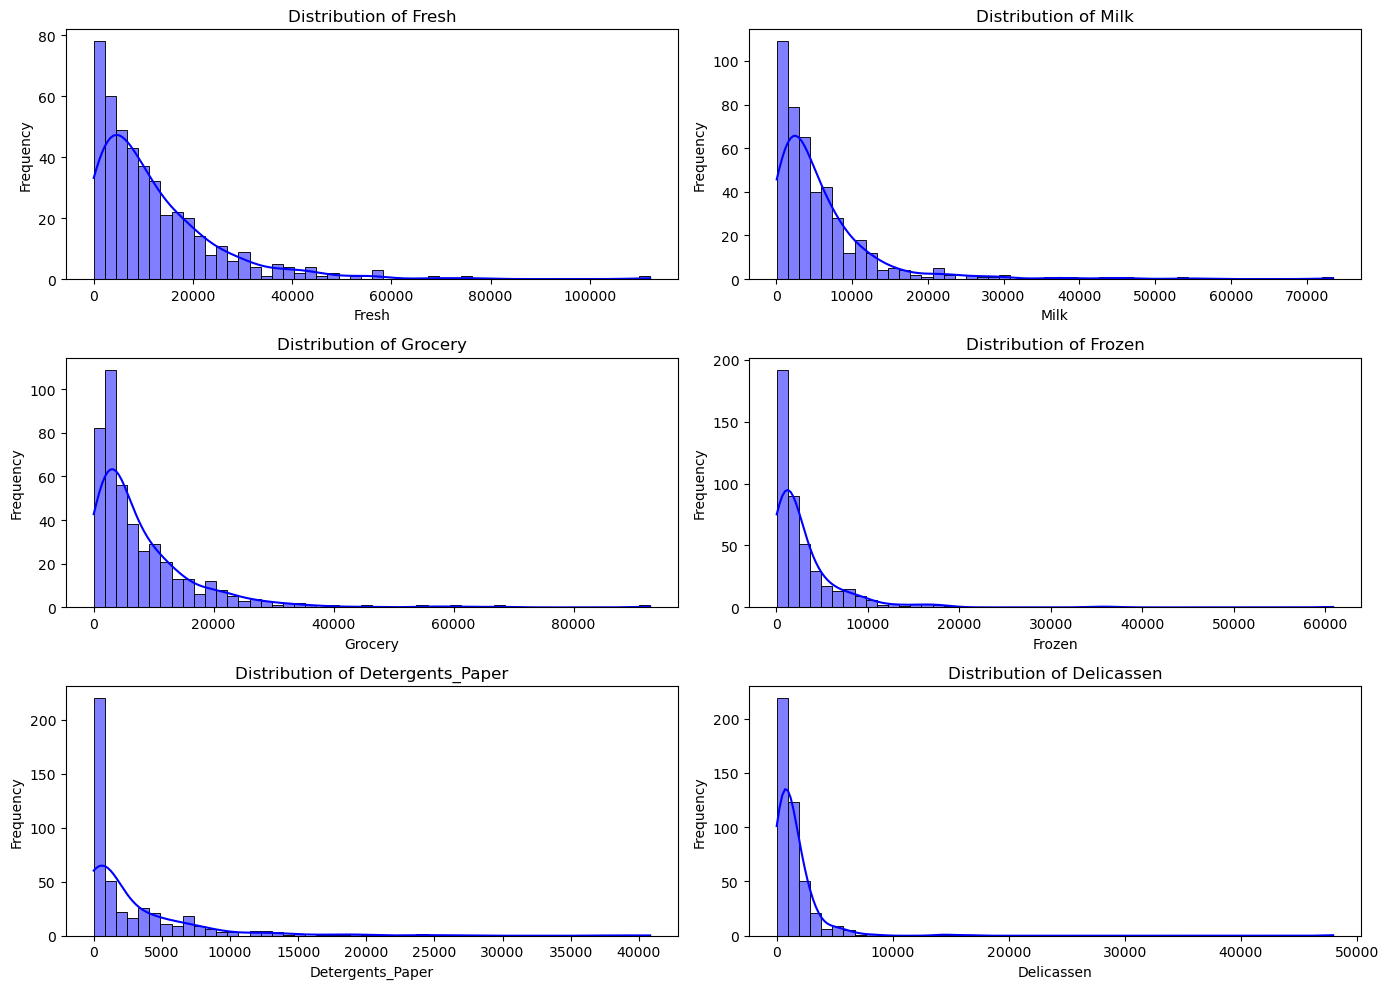

In [13]:
# Visualisation 1: Distribution Plots
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data[feature], kde=True, bins=50, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

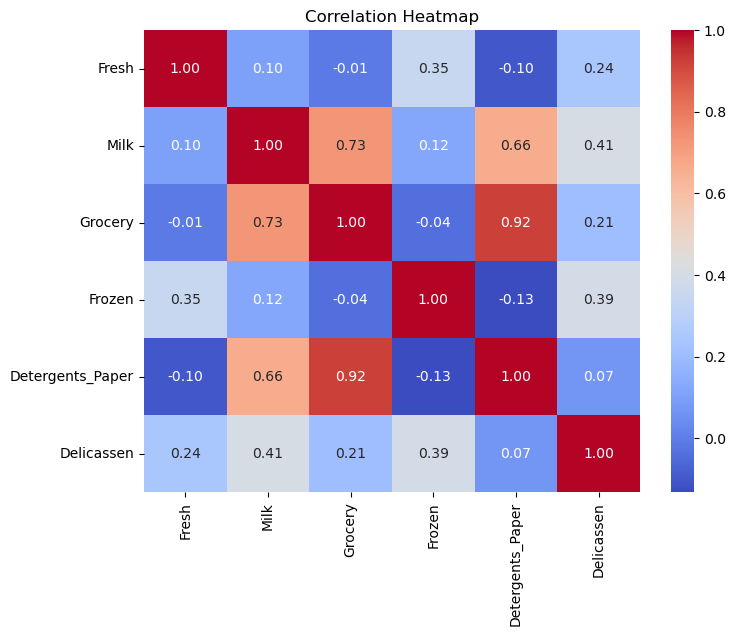

In [14]:
# Visualisation 2: Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

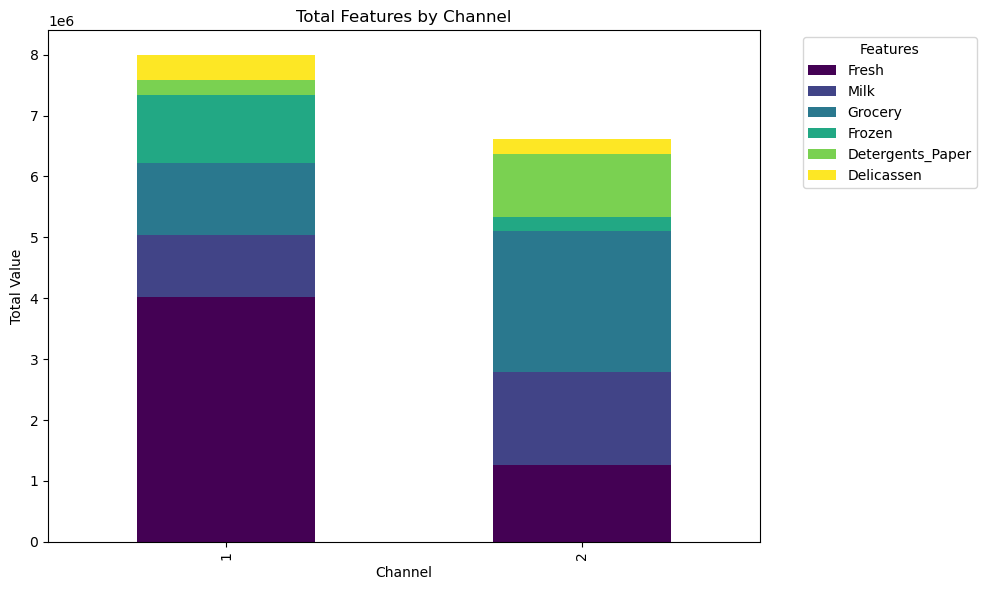

In [15]:
# Visualisation 3: Bar Plot of Total Features by Channel
channel_totals = data.groupby('Channel')[features].sum()
channel_totals.plot(kind='bar', figsize=(10, 6), stacked=True, cmap="viridis")
plt.title('Total Features by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Value')
plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x1400 with 0 Axes>

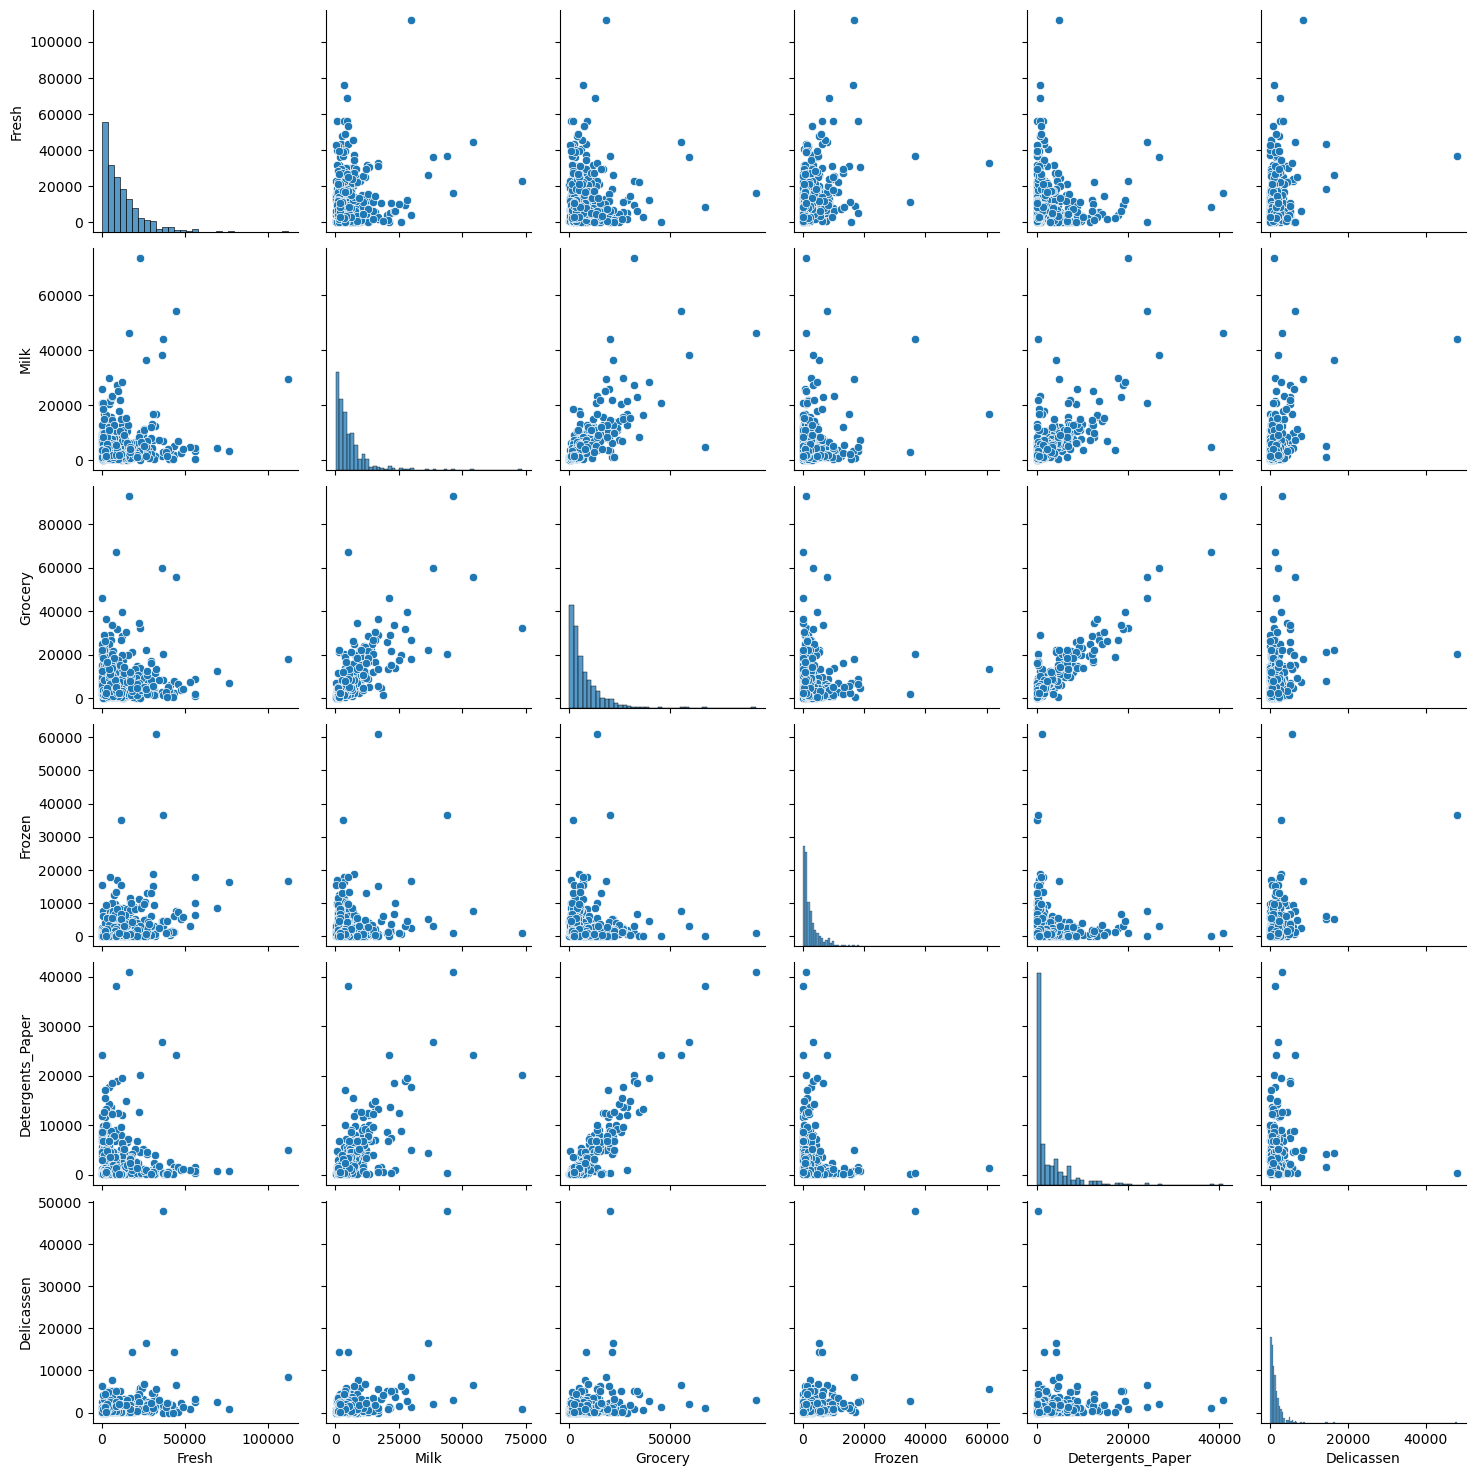

In [16]:
# Visualisation 4: Pair Plot
plt.figure(figsize = (14, 14))
sns.pairplot(data[features])
plt.show()

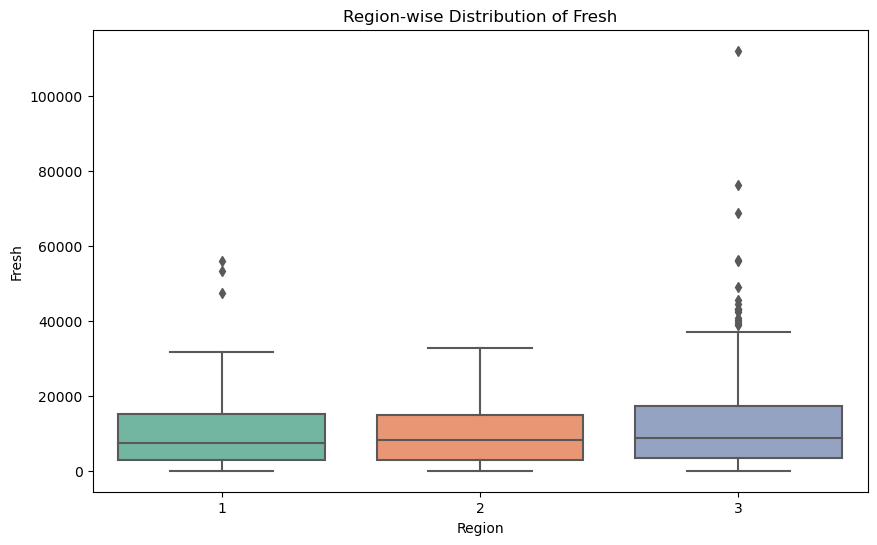

In [17]:
# Visualisation 5: Boxplot for Region-Wise sales of Fresh Foods products
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Fresh', data=data, palette="Set2")
plt.title('Region-wise Distribution of Fresh')
plt.xlabel('Region')
plt.ylabel('Fresh')
plt.show()

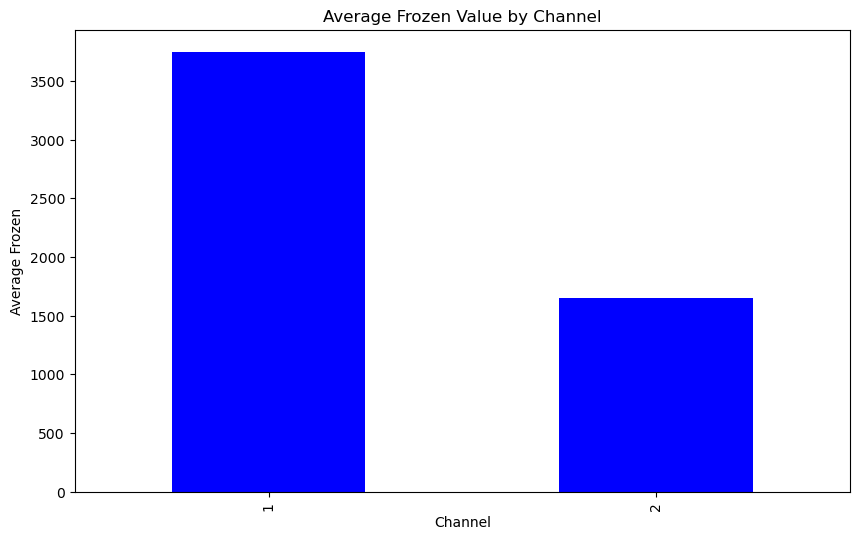

In [18]:
# Visualisation 6: Line Chart for sales of Frozen foods across Channels
plt.figure(figsize=(10, 6))
channel_frozen_means = data.groupby('Channel')['Frozen'].mean()
channel_frozen_means.plot(kind='bar', color='blue')
plt.title('Average Frozen Value by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Frozen')
plt.grid(False)
plt.show()

In [19]:
#ML Modelling
#Supervised Machine Learning: Classification
# Step 1: Feature crafting
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data['Food_Sales'] = data[features].sum(axis=1)

In [20]:
# Categorising Food_Sales into Spending Categories
def categorize_spending(value):
    if value < data['Food_Sales'].quantile(0.33):
        return 'Low'
    elif value < data['Food_Sales'].quantile(0.66):
        return 'Medium'
    else:
        return 'High'

In [21]:
data['Spending_Category'] = data['Food_Sales'].apply(categorize_spending)

In [22]:
spending_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
data['Spending_Category'] = data['Spending_Category'].map(spending_mapping)

In [23]:
# Step 2: Features and Target Selection
X = data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen']]
y = data['Spending_Category']

In [24]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Step 4: Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Step 5: Model Development and Testing
models = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators = 200, max_depth = 8, random_state=42),
    'Bagging Classifier': BaggingClassifier(random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=42),
    'XGBoost Classifier': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'CatBoost Classifier': CatBoostClassifier(verbose=0, random_state=42)
}


Model: Random Forest Classifier
Accuracy: 86.36%

Classification Report:
               precision    recall  f1-score   support

         Low       0.90      0.93      0.91        28
      Medium       0.78      0.78      0.78        27
        High       0.91      0.88      0.89        33

    accuracy                           0.86        88
   macro avg       0.86      0.86      0.86        88
weighted avg       0.86      0.86      0.86        88



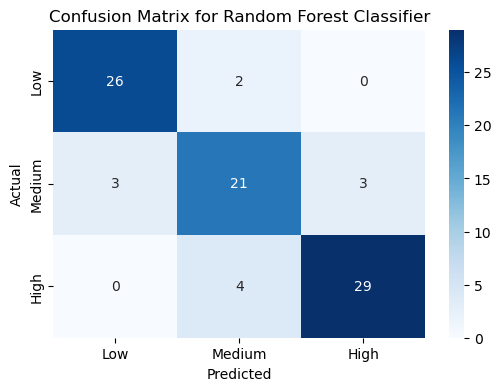


Model: Bagging Classifier
Accuracy: 81.82%

Classification Report:
               precision    recall  f1-score   support

         Low       0.84      0.93      0.88        28
      Medium       0.76      0.59      0.67        27
        High       0.83      0.91      0.87        33

    accuracy                           0.82        88
   macro avg       0.81      0.81      0.81        88
weighted avg       0.81      0.82      0.81        88



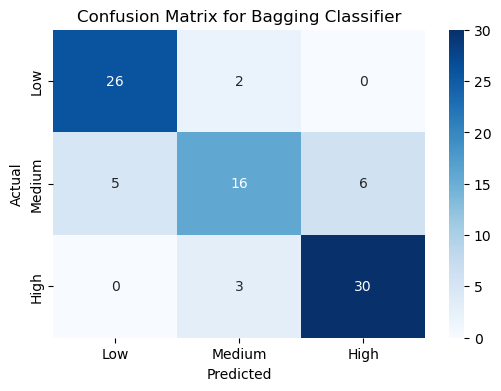


Model: AdaBoost Classifier
Accuracy: 76.14%

Classification Report:
               precision    recall  f1-score   support

         Low       0.84      0.57      0.68        28
      Medium       0.57      0.85      0.69        27
        High       0.97      0.85      0.90        33

    accuracy                           0.76        88
   macro avg       0.79      0.76      0.76        88
weighted avg       0.81      0.76      0.77        88



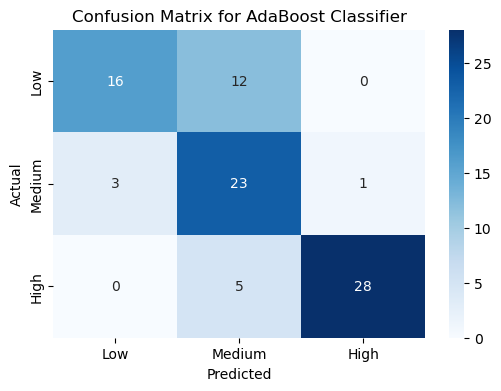


Model: XGBoost Classifier
Accuracy: 86.36%

Classification Report:
               precision    recall  f1-score   support

         Low       0.90      0.96      0.93        28
      Medium       0.86      0.67      0.75        27
        High       0.84      0.94      0.89        33

    accuracy                           0.86        88
   macro avg       0.86      0.86      0.86        88
weighted avg       0.86      0.86      0.86        88



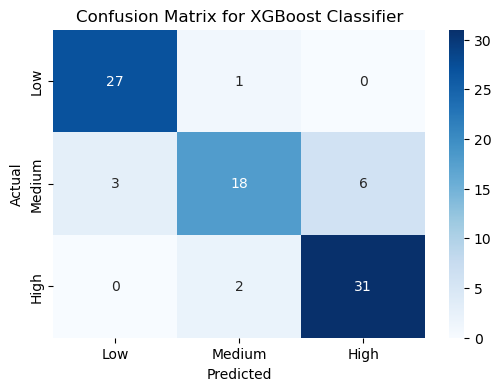


Model: CatBoost Classifier
Accuracy: 90.91%

Classification Report:
               precision    recall  f1-score   support

         Low       0.93      1.00      0.97        28
      Medium       0.91      0.78      0.84        27
        High       0.89      0.94      0.91        33

    accuracy                           0.91        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.91      0.91      0.91        88



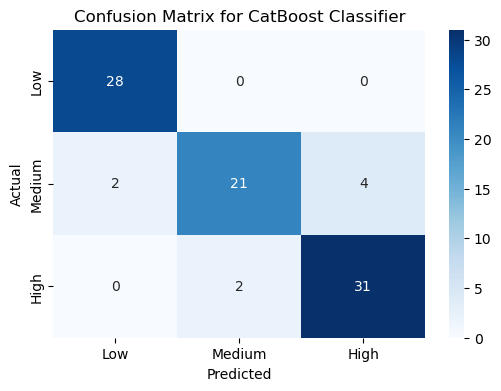

In [27]:
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Test the model
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)*100
    report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'])
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': cm
    }
    # Print results
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}%")
    print("\nClassification Report:\n", report)
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

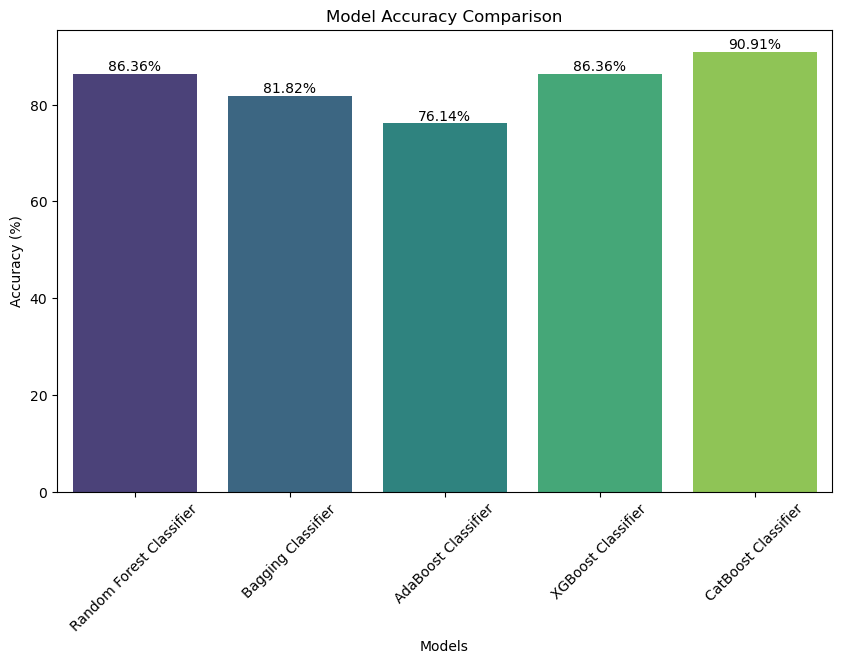

In [28]:
# Visualisation: Model Accuracy Comparison
model_names = list(results.keys())
accuracies = [metrics['Accuracy'] for metrics in results.values()]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=model_names, y=accuracies, palette='viridis')
for i, v in enumerate(accuracies):
    barplot.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.show()


In [29]:
# Step 6: Best-Fitted Model
best_model = max(results.items(), key=lambda x: x[1]['Accuracy'])
print("\nBest Model:", best_model[0])
print("Accuracy:", best_model[1]['Accuracy'])
print("\nClassification Report:\n", best_model[1]['Classification Report'])


Best Model: CatBoost Classifier
Accuracy: 90.9090909090909

Classification Report:
               precision    recall  f1-score   support

         Low       0.93      1.00      0.97        28
      Medium       0.91      0.78      0.84        27
        High       0.89      0.94      0.91        33

    accuracy                           0.91        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.91      0.91      0.91        88



In [30]:
#Unsupervised Machine Learning: Clustering
#K Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [31]:
X_clustering = data[['Channel','Fresh', 'Milk', 'Grocery', 'Frozen']]
X_clustering = X_clustering.dropna()
X_clustering.head()

,Channel,Fresh,Milk,Grocery,Frozen
0,2,12669,9656,7561,214
1,2,7057,9810,9568,1762
2,2,6353,8808,7684,2405
3,1,13265,1196,4221,6404
4,2,22615,5410,7198,3915


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)


In [33]:
# Elbow Method to find the optimal number of clusters
inertia = []
silhouette_scores = []

for k in range(2, 11):  # Start from k=2, since silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Inertia for the elbow method
    inertia.append(kmeans.inertia_)
    
    # Silhouette Score
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

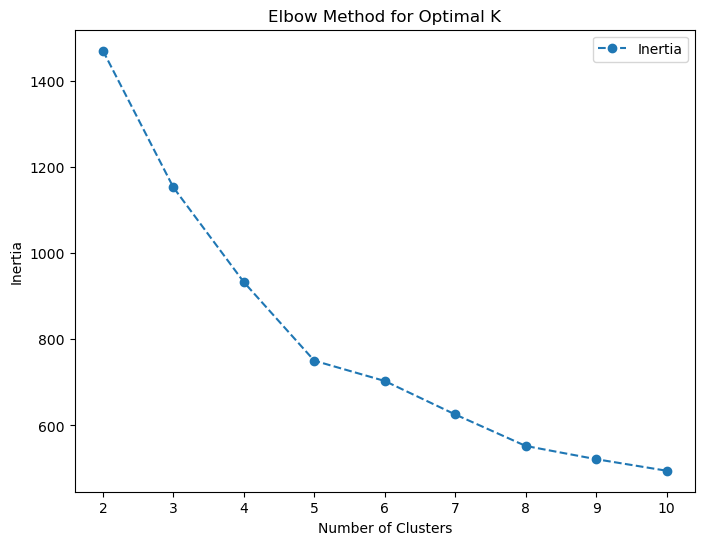

In [34]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--', label='Inertia')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper right')
plt.show()

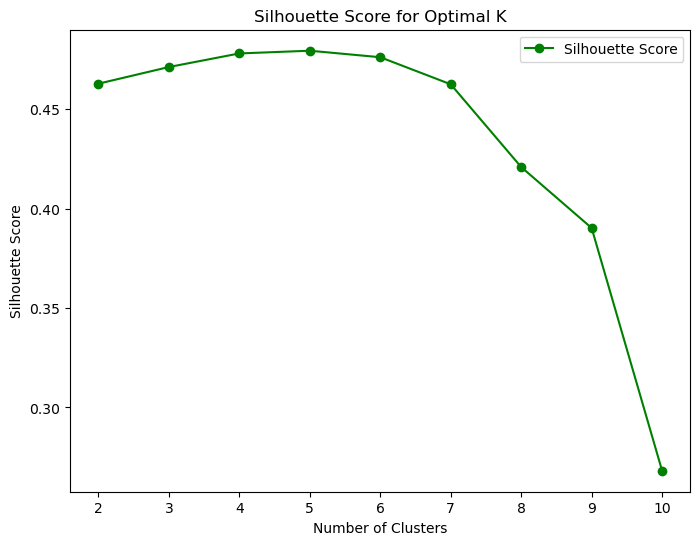

In [35]:
# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='green', label='Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend(loc='upper right')
plt.show()


In [36]:
# Optimal k based on the highest silhouette score
optimal_k_silhouette = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k_silhouette}")

Optimal number of clusters based on Silhouette Score: 5


In [37]:
optimal_k = 5

# K-Means Clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

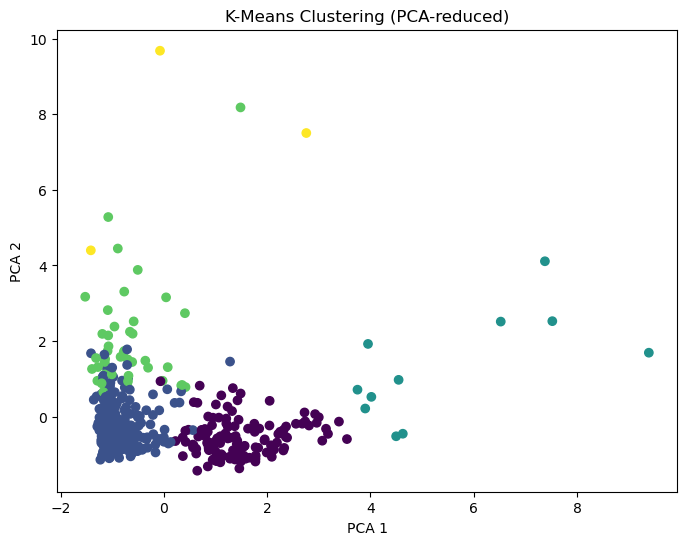

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [39]:
#Hierarchial Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Hierarchical Clustering (Agglomerative)
linkage_matrix = linkage(X_scaled, method='ward')

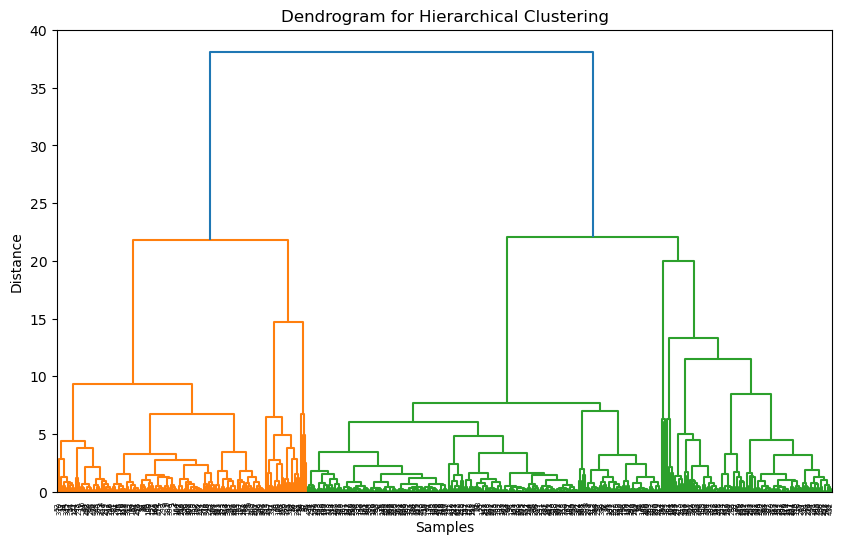

In [40]:
# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

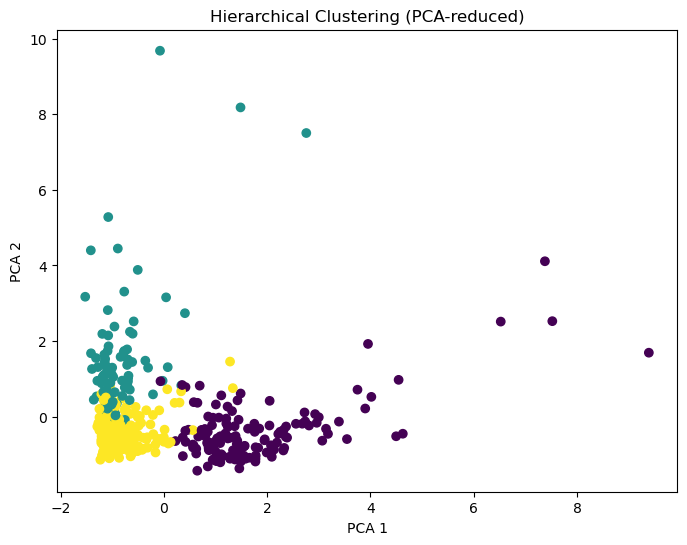

In [41]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Hierarchical_Cluster'] = hierarchical_model.fit_predict(X_scaled)

# Visualisation of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()